In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [3]:
file_path = '../output/state/'
files = sorted(os.listdir(file_path))
print(files)

['critical_prob=0.0&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=2&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=3&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=4&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=5&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=2&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=3&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=4&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=5&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.2&num_states=1&num_tasks=15&period=[10, 100]&task_ma

In [4]:
cfg = get_config('../cfg/state_exp_cfg.json')
state_less = {}
state_wise = {}

critical_prob_list = cfg['critical_prob_list']


for state_num in cfg['num_states_list'] :
    state_less[str(state_num)] = [ 0.0 ] * len(critical_prob_list)
    state_wise[str(state_num)] = [ 0.0 ] * len(critical_prob_list)

In [5]:
critical_prob_index = {str(p): i for i, p in enumerate(critical_prob_list)}

for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_less, core_wise = get_file_avg(file_path + file)

    num_states = params['num_states']
    critical_prob = params['critical_prob']

    state_less[num_states][critical_prob_index[critical_prob]] += core_less
    state_wise[num_states][critical_prob_index[critical_prob]] += core_wise


In [6]:
print(state_less)
print(state_wise)

{'1': [3.992, 4.122, 4.294, 4.502, 4.824, 5.17, 5.72, 6.21, 6.726, 7.424, 8.14], '2': [3.986, 4.3, 4.768, 5.202, 5.868, 6.428, 7.06, 7.438, 7.938, 8.256, 8.188], '3': [3.978, 4.444, 5.248, 5.88, 6.698, 7.394, 7.738, 8.144, 8.202, 8.186, 8.132], '4': [3.998, 4.64, 5.624, 6.444, 7.316, 7.784, 7.97, 8.196, 8.226, 8.562, 8.222], '5': [4.0, 4.97, 6.032, 7.016, 7.652, 8.068, 8.2, 8.246, 8.09, 8.37, 8.204]}
{'1': [3.992, 4.122, 4.294, 4.502, 4.824, 5.17, 5.72, 6.21, 6.726, 7.424, 8.14], '2': [3.986, 4.214, 4.488, 4.848, 5.2, 5.704, 6.19, 6.692, 7.414, 8.138, 8.188], '3': [3.978, 4.232, 4.582, 4.994, 5.418, 6.03, 6.474, 7.298, 7.79, 8.268, 8.132], '4': [3.998, 4.234, 4.67, 5.096, 5.658, 6.146, 6.618, 7.296, 7.962, 8.754, 8.222], '5': [4.0, 4.344, 4.734, 5.26, 5.736, 6.298, 6.866, 7.5, 7.95, 8.68, 8.204]}


In [7]:

vis_state_num = '5'

print(critical_prob_list)
print(state_less[vis_state_num])
print(state_wise[vis_state_num])

even_critical_prob_list = [critical_prob_list[i] for i in range(0, len(critical_prob_list), 2)]
even_state_less = [state_less[vis_state_num][i] for i in range(0, len(critical_prob_list), 2)]
even_state_wise = [state_wise[vis_state_num][i] for i in range(0, len(critical_prob_list), 2)]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
[4.0, 4.97, 6.032, 7.016, 7.652, 8.068, 8.2, 8.246, 8.09, 8.37, 8.204]
[4.0, 4.344, 4.734, 5.26, 5.736, 6.298, 6.866, 7.5, 7.95, 8.68, 8.204]


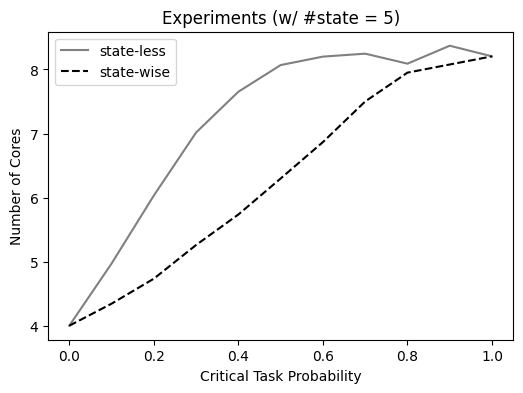

In [8]:
# Compare state-wise and state-less with criticality probability (#state = vis_state_num)


plt.figure(figsize=(6,4))

ax = plt.gca()

plt.plot(critical_prob_list, state_less[vis_state_num], label='state-less', color='gray')

critical_prob_list.pop(9)
state_wise[vis_state_num].pop(9)

plt.plot(critical_prob_list, state_wise[vis_state_num], label='state-wise', color='black', linestyle='dashed')

# plt.plot(critical_prob_list, state_less[vis_state_num], label='state-less', color='gray')
# plt.plot(critical_prob_list, state_wise[vis_state_num], label='state-wise', color='black', linestyle='dashed')

plt.title(f'Experiments (w/ #state = {vis_state_num})')
plt.xlabel('Critical Task Probability')
plt.ylabel('Number of Cores')
plt.legend()

# ax.set_ylim([3, 8])
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

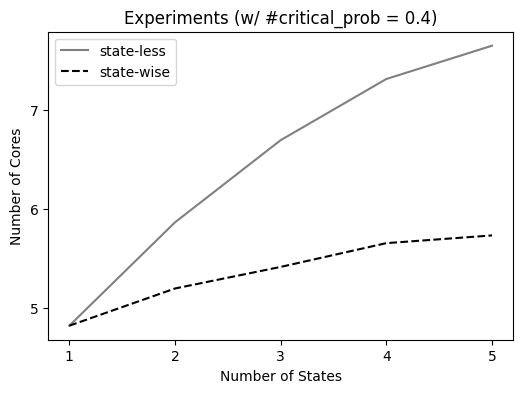

In [9]:
# Compare state-wise and state-less with #states (#critical_prob = vis_critical_prob)

vis_critical_prob = '0.4'

plt.figure(figsize=(6,4))

ax = plt.gca()

index = critical_prob_index[vis_critical_prob]
state_list = cfg['num_states_list']

def get_state_list(output_dict, index) :
    return [output_dict[str(s)][index] for s in state_list]

plt.plot(state_list, get_state_list(state_less, index), label='state-less', color='gray')
plt.plot(state_list, get_state_list(state_wise, index), label='state-wise', color='black', linestyle='dashed')

plt.title(f'Experiments (w/ #critical_prob = {vis_critical_prob})')
plt.xlabel('Number of States')
plt.ylabel('Number of Cores')
plt.legend()

# ax.set_ylim([3, 8])
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
# ax.yaxis.set_major_locator(plt.AutoLocator())
# ax.yaxis.set_major_locator(plt.IndexLocator(base=1, offset=0))

plt.show()